# Analyze the robustness of the proposed standard measurement

The robustness of the proposed standard measurement is analyzed here with data from: \
* the same five Cupra Borns in 2024 with mileages between 12000-17000km
* Cupra Born with license plate nr 213 was repeatadly measured 3 times in a row (in the course of a week without adding km) to analyze reproducibility
--> It is assumed that the vehicles were utilized similarly, as the were used in a research project analyzinig car sharing. More information on the research project can be found here:  [Comfficient Share](https://mcube-cluster.de/en/projekt/comfficientshare/)
* VW ID.3 analyzed in the aging section was also repeatedly measured 3 times in a row without adding km

In [3]:
import os
import sys
import math
sys.path.append(os.path.join(os.getcwd().partition('nature_soh')[0], "nature_soh"))
from src.config_base import GeneralConfig

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator, FixedLocator
import matplotlib.patches as patches
import matplotlib.patheffects as mpe

In [5]:
from src.data.read_feather import ReadFeather
from src.filtering.filter_methods import FilterMethods
from src.voltage_capacity_analysis.dva import DVA
from src.visualization.config_visualization import VisualizationConfig, instantiate_matplotlib_parameters, cm2inch
instantiate_matplotlib_parameters()
from src.visualization.colormaps import ColorMaps

In [6]:
VisualizationConfig.columnwidth_in_cm.value

8.8

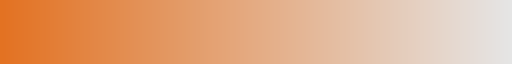

In [7]:
tum_orange_cmap = ColorMaps.orange_tum()
orange_colors = tum_orange_cmap(np.linspace(0,1, 10))
tum_orange_cmap

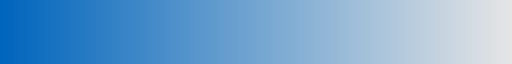

In [8]:
tum_blue_cmap = ColorMaps.blue_tum()
blue_colors = tum_blue_cmap(np.linspace(0,1, 10))
tum_blue_cmap

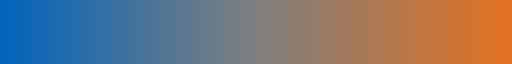

In [9]:
tum_cmap = ColorMaps.blue_orange_tum(grayscale=0.5)
colors = tum_cmap(np.linspace(0,1, 5))
tum_cmap

## Load Data

In [11]:
def filter_func_preprocess(signal):
    perc_filter = 1/100 * len(signal) #% filter
    filtered_signal = FilterMethods().rolling_mean_df(signal,window_size=FilterMethods().round_to_next_odd_number(perc_filter))
    #filtered_signal = FilterMethods().savgol(signal,window_size=FilterMethods().round_to_next_odd_number(perc_filter * len(signal)))
    return filtered_signal

In [12]:
read_feather = ReadFeather()
read_feather.set_filter_U(filter_func_preprocess)
read_feather.set_filter_Q(filter_func_preprocess)

Nr in file name corresponds to the license plate number

96% BMS-SOC equates to 100% UI-SOC, i.e. a fully charged vehicle, ask VW why

In [15]:
net_energy = 58

In [16]:
df_cupra_397_2024 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_397_JB_8A_CEE7_CS_2024.feather"))
df_cupra_349_2024 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_349_JB_8A_CEE7_CS_2024.feather"))
df_cupra_288_2024 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_288_JB_8A_CEE7_CS_2024.feather"))
df_cupra_204_2024 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_204_JB_8A_CEE7_CS_2024.feather"))
df_cupra_213_2024 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_213_JB_8A_CEE7_CS_2024.feather"))

In [17]:
print(f"SOC (min): {df_cupra_397_2024.SOC.min()} %")
print(f"SOC (max): {df_cupra_397_2024.SOC.max()} %")
print(f"U (min): {df_cupra_397_2024.U.min():.1f} V")
print(f"U (max): {df_cupra_397_2024.U.max():.1f} V")
print(f"E (max): {df_cupra_397_2024.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_397_2024.E.max()/net_energy*100:.1f} %")

SOC (min): 0.0 %
SOC (max): 96.0 %
U (min): 359.0 V
U (max): 447.5 V
E (max): 56.5 kWh
SOH_E: 97.4 %


In [18]:
print(f"SOC (min): {df_cupra_349_2024.SOC.min()} %")
print(f"SOC (max): {df_cupra_349_2024.SOC.max()} %")
print(f"U (min): {df_cupra_349_2024.U.min():.1f} V")
print(f"U (max): {df_cupra_349_2024.U.max():.1f} V")
print(f"E (max): {df_cupra_349_2024.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_349_2024.E.max()/net_energy*100:.1f} %")

SOC (min): 0.0 %
SOC (max): 96.0 %
U (min): 363.0 V
U (max): 449.3 V
E (max): 57.8 kWh
SOH_E: 99.6 %


In [19]:
print(f"SOC (min): {df_cupra_288_2024.SOC.min()} %")
print(f"SOC (max): {df_cupra_288_2024.SOC.max()} %")
print(f"U (min): {df_cupra_288_2024.U.min():.1f} V")
print(f"U (max): {df_cupra_288_2024.U.max():.1f} V")
print(f"E (max): {df_cupra_288_2024.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_288_2024.E.max()/net_energy*100:.1f} %")

SOC (min): 0.0 %
SOC (max): 96.0 %
U (min): 361.8 V
U (max): 449.3 V
E (max): 57.7 kWh
SOH_E: 99.4 %


In [20]:
print(f"SOC (min): {df_cupra_204_2024.SOC.min()} %")
print(f"SOC (max): {df_cupra_204_2024.SOC.max()} %")
print(f"U (min): {df_cupra_204_2024.U.min():.1f} V")
print(f"U (max): {df_cupra_204_2024.U.max():.1f} V")
print(f"E (max): {df_cupra_204_2024.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_204_2024.E.max()/net_energy*100:.1f} %")

SOC (min): 0.0 %
SOC (max): 96.0 %
U (min): 358.8 V
U (max): 452.2 V
E (max): 58.7 kWh
SOH_E: 101.1 %


In [21]:
print(f"SOC (min): {df_cupra_213_2024.SOC.min()} %")
print(f"SOC (max): {df_cupra_213_2024.SOC.max()} %")
print(f"U (min): {df_cupra_213_2024.U.min():.1f} V")
print(f"U (max): {df_cupra_213_2024.U.max():.1f} V")
print(f"E (max): {df_cupra_213_2024.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_213_2024.E.max()/net_energy*100:.1f} %")

SOC (min): 0.0 %
SOC (max): 96.0 %
U (min): 357.2 V
U (max): 453.0 V
E (max): 60.5 kWh
SOH_E: 104.2 %


## fixed betweem 370-445V

In [23]:
%%capture
df_cupra_397_2024 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_397_JB_8A_CEE7_CS_2024.feather"), lower_voltage=370, upper_voltage=445)
df_cupra_349_2024 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_349_JB_8A_CEE7_CS_2024.feather"), lower_voltage=370, upper_voltage=445)
df_cupra_288_2024 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_288_JB_8A_CEE7_CS_2024.feather"), lower_voltage=370, upper_voltage=445)
df_cupra_204_2024 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_204_JB_8A_CEE7_CS_2024.feather"), lower_voltage=370, upper_voltage=445)
df_cupra_213_2024 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_213_JB_8A_CEE7_CS_2024.feather"), lower_voltage=370, upper_voltage=445)

In [24]:
print(f"SOC (min): {df_cupra_397_2024.SOC.min()} %")
print(f"SOC (max): {df_cupra_397_2024.SOC.max()} %")
print(f"U (min): {df_cupra_397_2024.U.min():.1f} V")
print(f"U (max): {df_cupra_397_2024.U.max():.1f} V")
print(f"E (max): {df_cupra_397_2024.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_397_2024.E.max()/net_energy*100:.1f} %")

SOC (min): 3.2 %
SOC (max): 93.6 %
U (min): 370.0 V
U (max): 445.0 V
E (max): 53.3 kWh
SOH_E: 92.0 %


In [25]:
print(f"SOC (min): {df_cupra_349_2024.SOC.min()} %")
print(f"SOC (max): {df_cupra_349_2024.SOC.max()} %")
print(f"U (min): {df_cupra_349_2024.U.min():.1f} V")
print(f"U (max): {df_cupra_349_2024.U.max():.1f} V")
print(f"E (max): {df_cupra_349_2024.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_349_2024.E.max()/net_energy*100:.1f} %")

SOC (min): 2.4 %
SOC (max): 92.4 %
U (min): 370.0 V
U (max): 445.0 V
E (max): 53.9 kWh
SOH_E: 93.0 %


In [26]:
print(f"SOC (min): {df_cupra_288_2024.SOC.min()} %")
print(f"SOC (max): {df_cupra_288_2024.SOC.max()} %")
print(f"U (min): {df_cupra_288_2024.U.min():.1f} V")
print(f"U (max): {df_cupra_288_2024.U.max():.1f} V")
print(f"E (max): {df_cupra_288_2024.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_288_2024.E.max()/net_energy*100:.1f} %")

SOC (min): 2.4 %
SOC (max): 92.0 %
U (min): 370.0 V
U (max): 445.0 V
E (max): 53.7 kWh
SOH_E: 92.6 %


In [27]:
print(f"SOC (min): {df_cupra_204_2024.SOC.min()} %")
print(f"SOC (max): {df_cupra_204_2024.SOC.max()} %")
print(f"U (min): {df_cupra_204_2024.U.min():.1f} V")
print(f"U (max): {df_cupra_204_2024.U.max():.1f} V")
print(f"E (max): {df_cupra_204_2024.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_204_2024.E.max()/net_energy*100:.1f} %")

SOC (min): 3.2 %
SOC (max): 89.6 %
U (min): 370.0 V
U (max): 445.0 V
E (max): 52.7 kWh
SOH_E: 90.8 %


In [28]:
print(f"SOC (min): {df_cupra_213_2024.SOC.min()} %")
print(f"SOC (max): {df_cupra_213_2024.SOC.max()} %")
print(f"U (min): {df_cupra_213_2024.U.min():.1f} V")
print(f"U (max): {df_cupra_213_2024.U.max():.1f} V")
print(f"E (max): {df_cupra_213_2024.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_213_2024.E.max()/net_energy*100:.1f} %")

SOC (min): 3.2 %
SOC (max): 89.2 %
U (min): 370.0 V
U (max): 445.0 V
E (max): 53.8 kWh
SOH_E: 92.8 %


## 2024 repeated measurements

In [30]:
%%capture
df_cupra_213_2024_rep2 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_213_JB_8A_CEE7_CS_2024_Rep2.feather"))
df_cupra_213_2024_rep3 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_213_JB_8A_CEE7_CS_2024_Rep3.feather"))

In [31]:
print(f"SOC (min): {df_cupra_213_2024_rep2.SOC.min()} %")
print(f"SOC (max): {df_cupra_213_2024_rep2.SOC.max()} %")
print(f"U (min): {df_cupra_213_2024_rep2.U.min():.1f} V")
print(f"U (max): {df_cupra_213_2024_rep2.U.max():.1f} V")
print(f"E (max): {df_cupra_213_2024_rep2.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_213_2024_rep2.E.max()/net_energy*100:.1f} %")

SOC (min): 0.0 %
SOC (max): 96.0 %
U (min): 359.0 V
U (max): 453.0 V
E (max): 60.5 kWh
SOH_E: 104.2 %


In [32]:
print(f"SOC (min): {df_cupra_213_2024_rep3.SOC.min()} %")
print(f"SOC (max): {df_cupra_213_2024_rep3.SOC.max()} %")
print(f"U (min): {df_cupra_213_2024_rep3.U.min():.1f} V")
print(f"U (max): {df_cupra_213_2024_rep3.U.max():.1f} V")
print(f"E (max): {df_cupra_213_2024_rep3.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_213_2024_rep3.E.max()/net_energy*100:.1f} %")

SOC (min): 0.0 %
SOC (max): 96.0 %
U (min): 363.5 V
U (max): 452.6 V
E (max): 59.9 kWh
SOH_E: 103.2 %


In [33]:
%%capture
df_cupra_213_2024_rep2 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_213_JB_8A_CEE7_CS_2024_Rep2.feather"), lower_voltage=370, upper_voltage=445)
df_cupra_213_2024_rep3 =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Cupra","Cupra_Born_213_JB_8A_CEE7_CS_2024_Rep3.feather"), lower_voltage=370, upper_voltage=445)

In [34]:
print(f"SOC (min): {df_cupra_213_2024_rep2.SOC.min()} %")
print(f"SOC (max): {df_cupra_213_2024_rep2.SOC.max()} %")
print(f"U (min): {df_cupra_213_2024_rep2.U.min():.1f} V")
print(f"U (max): {df_cupra_213_2024_rep2.U.max():.1f} V")
print(f"E (max): {df_cupra_213_2024_rep2.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_213_2024_rep2.E.max()/net_energy*100:.1f} %")

SOC (min): 3.2 %
SOC (max): 89.2 %
U (min): 370.0 V
U (max): 445.0 V
E (max): 53.9 kWh
SOH_E: 93.0 %


In [35]:
print(f"SOC (min): {df_cupra_213_2024_rep3.SOC.min()} %")
print(f"SOC (max): {df_cupra_213_2024_rep3.SOC.max()} %")
print(f"U (min): {df_cupra_213_2024_rep3.U.min():.1f} V")
print(f"U (max): {df_cupra_213_2024_rep3.U.max():.1f} V")
print(f"E (max): {df_cupra_213_2024_rep3.E.max():.1f} kWh")
print(f"SOH_E: {df_cupra_213_2024_rep3.E.max()/net_energy*100:.1f} %")

SOC (min): 2.4 %
SOC (max): 89.6 %
U (min): 370.0 V
U (max): 445.0 V
E (max): 54.0 kWh
SOH_E: 93.1 %


In [93]:
60.5-56.5

4.0

In [95]:
53.9-52.7

1.1999999999999957

In [97]:
60.5-59.9

0.6000000000000014

In [99]:
54.0-53.8

0.20000000000000284